In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf

In [2]:
dataset = pd.read_csv(r'C:\Projects_ciência_dados\DEPRESSAO_ESTUDANTIL\data\raw\Depressão_Estudantil.csv')

In [3]:
dataset.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
np.unique(dataset["Depression"], return_counts=True)

(array([0, 1]), array([11565, 16336]))

In [5]:
dataset.shape

(27901, 18)

In [6]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [7]:
dataset.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [8]:
dataset.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [9]:
np.unique(dataset["Profession"], return_counts=True) # Quase todas as profissões é estudante

(array(["'Civil Engineer'", "'Content Writer'", "'Digital Marketer'",
        "'Educational Consultant'", "'UX/UI Designer'", 'Architect',
        'Chef', 'Doctor', 'Entrepreneur', 'Lawyer', 'Manager',
        'Pharmacist', 'Student', 'Teacher'], dtype=object),
 array([    1,     2,     3,     1,     1,     8,     2,     2,     1,
            1,     1,     2, 27870,     6]))

In [10]:
dataset.loc[dataset["Profession"] == "Teacher"].shape[0]

6

In [11]:
dataset.loc[dataset["Age"], "Age"].mean()

np.float64(24.660979893193794)

In [12]:
dataset.loc[(dataset["Age"]<=24) & (dataset["Profession"]!= "Student")].shape[0] # Profissão menor ou igual a 24 anos e não é estudante

11

In [13]:
dataset.loc[dataset["Profession"] != "Student"].shape[0]

31

In [14]:
negativas = dataset.select_dtypes(["int", "float"])
(negativas<0).any().sum()

np.int64(0)

In [15]:
dataset.loc[(dataset["Family History of Mental Illness"] == "Yes") & dataset["Depression"] == 1].shape[0] # Histórico familiar de doença mental e tem depressão

8273

In [16]:
dataset.shape[0]

27901

In [17]:
porcentagem_historico_familiar_depressao = (8273/27901)*100
print(porcentagem_historico_familiar_depressao)

29.651266979678148


In [18]:
np.unique(dataset["Degree"], return_counts=True)

(array(["'Class 12'", 'B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA',
        'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'LLB', 'LLM', 'M.Com', 'M.Ed',
        'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MHM',
        'MSc', 'Others', 'PhD'], dtype=object),
 array([6080, 1478, 1506, 1867,  810, 1152,  600,  696, 1433,  613,  925,
         888,  671,  482,  734,  821,  582, 1022,  544,  562,  696, 1044,
         572,  185,  191, 1190,   35,  522]))

In [19]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [20]:
dataset

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [21]:
dataset.loc[(dataset["Sleep Duration"] == "Less than 5 hours") & (dataset["Depression"] == 1)]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression


In [22]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

In [23]:
np.unique(dataset["Degree"], return_counts=True)

(array(["'Class 12'", 'B.Arch', 'B.Com', 'B.Ed', 'B.Pharm', 'B.Tech', 'BA',
        'BBA', 'BCA', 'BE', 'BHM', 'BSc', 'LLB', 'LLM', 'M.Com', 'M.Ed',
        'M.Pharm', 'M.Tech', 'MA', 'MBA', 'MBBS', 'MCA', 'MD', 'ME', 'MHM',
        'MSc', 'Others', 'PhD'], dtype=object),
 array([6080, 1478, 1506, 1867,  810, 1152,  600,  696, 1433,  613,  925,
         888,  671,  482,  734,  821,  582, 1022,  544,  562,  696, 1044,
         572,  185,  191, 1190,   35,  522]))

###### Qtd de pessoas que tem phd e depressão

In [24]:
len(dataset.loc[(dataset["Degree"] == "PhD") & dataset["Depression"] == 1])

286

In [25]:
np.unique(dataset["Depression"], return_counts=True)

(array([0, 1]), array([11565, 16336]))

In [26]:
ensino_medio_depressao = dataset.loc[(dataset["Degree"] == "'Class 12'") & (dataset["Depression"] == 1)].shape[0]
ensino_medio_depressao

4303

###### 70,77 porcento dos estudantes do ensino médio tem depressão

In [27]:
porcentagem_ensino_medio_depressoa = (ensino_medio_depressao / 6080)*100
porcentagem_ensino_medio_depressoa

70.77302631578948

In [28]:
graduacao = [
    "B.Arch", "B.Com", "B.Pharm", "B.Tech", "BA", "BBA", "BCA", "BE", "BHM", "BSc", "LLB"
]

mestrado = [
    "M.Com", "M.Pharm", "M.Tech", "MA", "MBA", "MCA", "ME", "MHM", "MSc", "LLM", "M.Ed"
]

doutorado = [
    "PhD", "MD"
]

In [29]:
pos_graduacao = [
    
]

In [30]:
dataset["High-School"] = np.where(dataset["Degree"] == "'Class 12'",1,0)
dataset["Bachelors"] = np.where(dataset["Degree"].isin(graduacao), 1,0)
dataset["Masters"] = np.where(dataset["Degree"].isin(mestrado), 1,0)
dataset["Doctorate"] = np.where(dataset["Degree"].isin(doutorado), 1,0)

In [31]:
dataset.loc[dataset["Degree"] == "'Class 12'"]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,High-School,Bachelors,Masters,Doctorate
7,56,Female,30.0,Chennai,Student,2.0,0.0,8.04,4.0,0.0,...,'Class 12',No,0.0,1.0,Yes,0,1,0,0,0
10,83,Male,24.0,Nagpur,Student,3.0,0.0,6.10,3.0,0.0,...,'Class 12',Yes,11.0,1.0,Yes,1,1,0,0,0
13,100,Female,19.0,Rajkot,Student,2.0,0.0,8.52,4.0,0.0,...,'Class 12',No,6.0,2.0,Yes,0,1,0,0,0
14,103,Female,19.0,Kalyan,Student,5.0,0.0,5.64,5.0,0.0,...,'Class 12',Yes,4.0,5.0,Yes,1,1,0,0,0
17,132,Female,20.0,Ahmedabad,Student,5.0,0.0,7.25,3.0,0.0,...,'Class 12',Yes,10.0,3.0,No,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27888,140630,Male,19.0,Kolkata,Student,4.0,0.0,7.13,1.0,0.0,...,'Class 12',No,10.0,2.0,No,1,1,0,0,0
27890,140635,Male,28.0,Ludhiana,Student,3.0,0.0,5.03,3.0,0.0,...,'Class 12',Yes,6.0,2.0,Yes,0,1,0,0,0
27892,140669,Female,20.0,Indore,Student,3.0,0.0,7.72,5.0,0.0,...,'Class 12',Yes,8.0,1.0,No,0,1,0,0,0
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,...,'Class 12',Yes,7.0,1.0,Yes,0,1,0,0,0


In [32]:
dataset.loc[dataset["Degree"] == "PhD"]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,High-School,Bachelors,Masters,Doctorate
5,33,Male,29.0,Pune,Student,2.0,0.0,5.70,3.0,0.0,...,PhD,No,4.0,1.0,No,0,0,0,0,1
33,240,Female,31.0,Kalyan,Student,1.0,0.0,5.87,3.0,0.0,...,PhD,No,8.0,4.0,Yes,0,0,0,0,1
163,793,Female,27.0,Pune,Student,3.0,0.0,5.59,4.0,0.0,...,PhD,Yes,6.0,5.0,Yes,1,0,0,0,1
192,926,Male,33.0,Srinagar,Student,3.0,0.0,7.07,5.0,0.0,...,PhD,No,7.0,1.0,Yes,0,0,0,0,1
307,1493,Female,35.0,Meerut,Student,5.0,0.0,5.32,2.0,0.0,...,PhD,No,3.0,4.0,Yes,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27678,139549,Female,30.0,Ludhiana,Student,3.0,0.0,10.00,1.0,0.0,...,PhD,Yes,3.0,1.0,No,0,0,0,0,1
27687,139583,Female,27.0,Delhi,Student,4.0,0.0,5.61,3.0,0.0,...,PhD,No,12.0,1.0,No,1,0,0,0,1
27746,139830,Male,27.0,Mumbai,Student,4.0,0.0,6.28,2.0,0.0,...,PhD,No,8.0,3.0,Yes,1,0,0,0,1
27775,139991,Male,32.0,Meerut,Student,1.0,0.0,8.50,4.0,0.0,...,PhD,No,9.0,2.0,No,0,0,0,0,1


In [33]:
dataset

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,High-School,Bachelors,Masters,Doctorate
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,B.Pharm,Yes,3.0,1.0,No,1,0,1,0,0
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,BSc,No,3.0,2.0,Yes,0,0,1,0,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,BA,No,9.0,1.0,Yes,0,0,1,0,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,BCA,Yes,4.0,5.0,Yes,1,0,1,0,0
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,M.Tech,Yes,1.0,1.0,No,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,...,'Class 12',Yes,7.0,1.0,Yes,0,1,0,0,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,...,MSc,No,0.0,3.0,Yes,0,0,0,1,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,...,MD,No,12.0,2.0,No,0,0,0,0,1
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,...,'Class 12',Yes,10.0,5.0,No,1,1,0,0,0


In [34]:
dataset.loc[dataset["Degree"] == "Others"]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,High-School,Bachelors,Masters,Doctorate
624,3227,Male,28.0,Varanasi,Student,4.0,0.0,5.66,4.0,0.0,...,Others,Yes,10.0,5.0,Yes,1,0,0,0,0
842,4337,Male,28.0,Visakhapatnam,Student,1.0,0.0,7.94,4.0,0.0,...,Others,Yes,10.0,3.0,No,1,0,0,0,0
1897,9719,Female,22.0,Srinagar,Student,1.0,0.0,8.04,4.0,0.0,...,Others,No,10.0,5.0,No,0,0,0,0,0
2609,13315,Female,20.0,Bhopal,Student,5.0,0.0,5.58,2.0,0.0,...,Others,No,8.0,4.0,Yes,1,0,0,0,0
2928,14834,Male,27.0,Kolkata,Student,5.0,0.0,8.04,1.0,0.0,...,Others,No,11.0,3.0,Yes,1,0,0,0,0
3189,16067,Male,20.0,Lucknow,Student,2.0,0.0,9.36,3.0,0.0,...,Others,No,2.0,5.0,No,1,0,0,0,0
3672,18420,Male,18.0,Nashik,Student,4.0,0.0,7.47,3.0,0.0,...,Others,Yes,11.0,4.0,No,1,0,0,0,0
4127,20659,Male,19.0,Kolkata,Student,3.0,0.0,7.53,1.0,0.0,...,Others,No,0.0,5.0,Yes,1,0,0,0,0
4427,22201,Female,22.0,Vasai-Virar,Student,4.0,0.0,6.03,3.0,0.0,...,Others,Yes,6.0,3.0,No,0,0,0,0,0
4516,22609,Female,23.0,Kolkata,Student,3.0,0.0,5.32,4.0,0.0,...,Others,No,7.0,4.0,Yes,1,0,0,0,0


In [35]:
coluna = dataset.pop("Depression")
dataset["Depression"] = coluna


In [36]:
dataset

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,High-School,Bachelors,Masters,Doctorate,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,B.Pharm,Yes,3.0,1.0,No,0,1,0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,BSc,No,3.0,2.0,Yes,0,1,0,0,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,BA,No,9.0,1.0,Yes,0,1,0,0,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,BCA,Yes,4.0,5.0,Yes,0,1,0,0,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,M.Tech,Yes,1.0,1.0,No,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,...,'Class 12',Yes,7.0,1.0,Yes,1,0,0,0,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,...,MSc,No,0.0,3.0,Yes,0,0,1,0,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,...,MD,No,12.0,2.0,No,0,0,0,1,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,...,'Class 12',Yes,10.0,5.0,No,1,0,0,0,1


In [37]:
dataset

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,High-School,Bachelors,Masters,Doctorate,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,...,B.Pharm,Yes,3.0,1.0,No,0,1,0,0,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,...,BSc,No,3.0,2.0,Yes,0,1,0,0,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,...,BA,No,9.0,1.0,Yes,0,1,0,0,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,...,BCA,Yes,4.0,5.0,Yes,0,1,0,0,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,...,M.Tech,Yes,1.0,1.0,No,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,...,'Class 12',Yes,7.0,1.0,Yes,1,0,0,0,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,...,MSc,No,0.0,3.0,Yes,0,0,1,0,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,...,MD,No,12.0,2.0,No,0,0,0,1,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,...,'Class 12',Yes,10.0,5.0,No,1,0,0,0,1


##### Descobrir como vou passar esse dataset para 02-preprocessing

In [38]:
dataset.to_csv("../data/processed/clean_step1.csv", index=False)

In [39]:
v = dataset.isnull().sum()
print(v)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
High-School                              0
Bachelors                                0
Masters                                  0
Doctorate                                0
Depression                               0
dtype: int64


In [40]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'High-School',
       'Bachelors', 'Masters', 'Doctorate', 'Depression'],
      dtype='object')

In [41]:
dataset.loc[dataset["Sleep Duration"].isnull()]

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,...,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,High-School,Bachelors,Masters,Doctorate,Depression


In [42]:
dataset["Sleep Duration"]

0                '5-6 hours'
1                '5-6 hours'
2        'Less than 5 hours'
3                '7-8 hours'
4                '5-6 hours'
                ...         
27896            '5-6 hours'
27897    'Less than 5 hours'
27898            '5-6 hours'
27899    'Less than 5 hours'
27900    'Less than 5 hours'
Name: Sleep Duration, Length: 27901, dtype: object

In [43]:
np.unique(dataset["Sleep Duration"], return_counts=True)

(array(["'5-6 hours'", "'7-8 hours'", "'Less than 5 hours'",
        "'More than 8 hours'", 'Others'], dtype=object),
 array([6183, 7346, 8310, 6044,   18]))

In [44]:
dataset_test = dataset

In [45]:
soma = 6183+7346+8310+6044+18
soma

27901

In [46]:
dataset.shape[0]

27901

In [47]:
type(dataset["Depression"].shape[0])

int

In [48]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'High-School',
       'Bachelors', 'Masters', 'Doctorate', 'Depression'],
      dtype='object')

<Axes: xlabel='Sleep Duration', ylabel='Depression'>

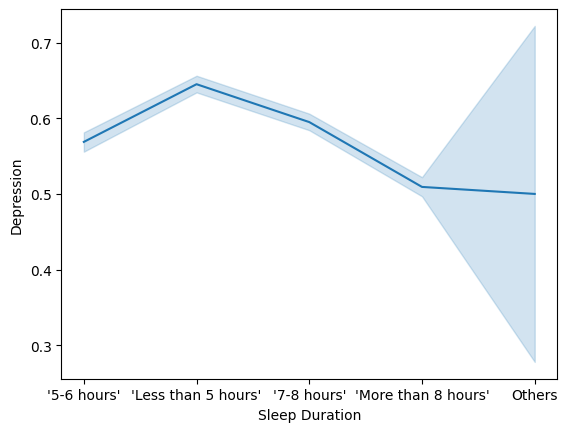

In [50]:
sns.lineplot(data=dataset, x="Sleep Duration", y="Depression")

<Axes: xlabel='Sleep Duration', ylabel='Depression'>

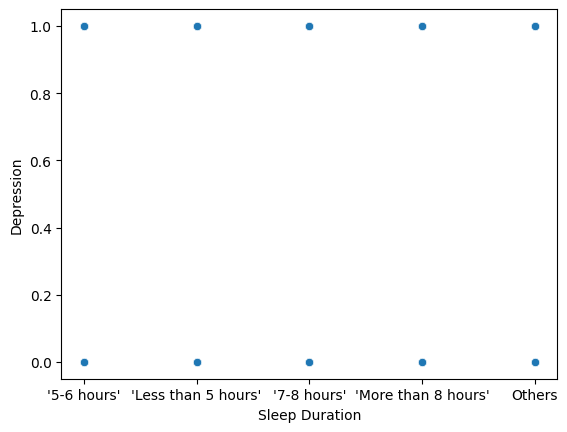

In [51]:
sns.scatterplot(data=dataset, x="Sleep Duration", y="Depression")

<Axes: xlabel='Age', ylabel='Count'>

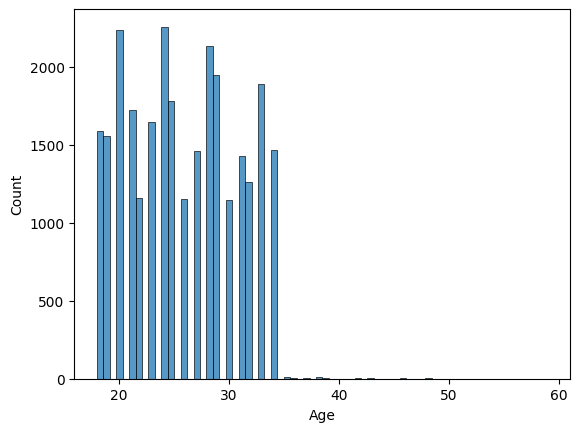

In [53]:
sns.histplot(data=dataset, x="Age")

In [54]:
dataset["Work/Study Hours"]

0         3.0
1         3.0
2         9.0
3         4.0
4         1.0
         ... 
27896     7.0
27897     0.0
27898    12.0
27899    10.0
27900     2.0
Name: Work/Study Hours, Length: 27901, dtype: float64

In [55]:
dataset["Financial Stress"]

0        1.0
1        2.0
2        1.0
3        5.0
4        1.0
        ... 
27896    1.0
27897    3.0
27898    2.0
27899    5.0
27900    3.0
Name: Financial Stress, Length: 27901, dtype: object

<Axes: xlabel='Financial Stress', ylabel='count'>

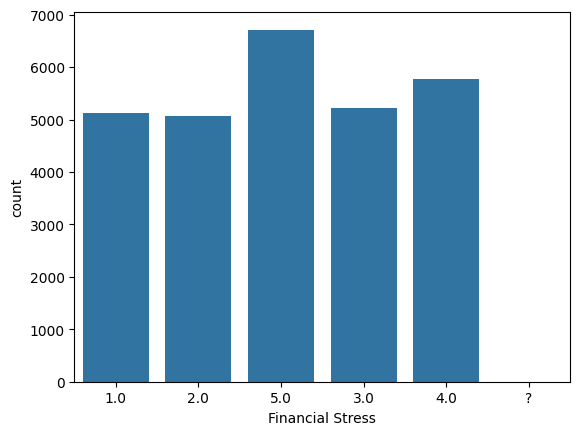

In [56]:
sns.countplot(data=dataset, x="Financial Stress")

<Axes: xlabel='Financial Stress', ylabel='Work/Study Hours'>

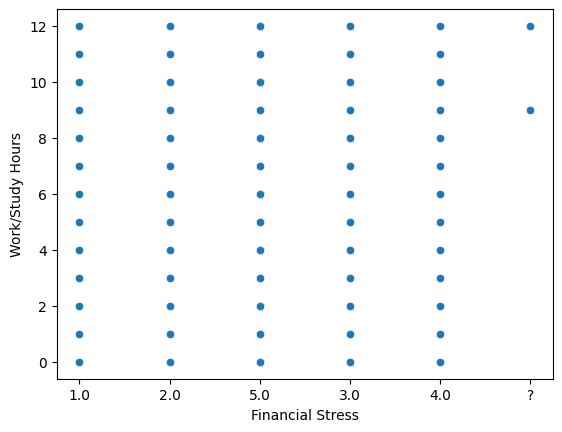

In [58]:
sns.scatterplot(data=dataset, x="Financial Stress", y="Work/Study Hours")

<Axes: xlabel='Depression', ylabel='count'>

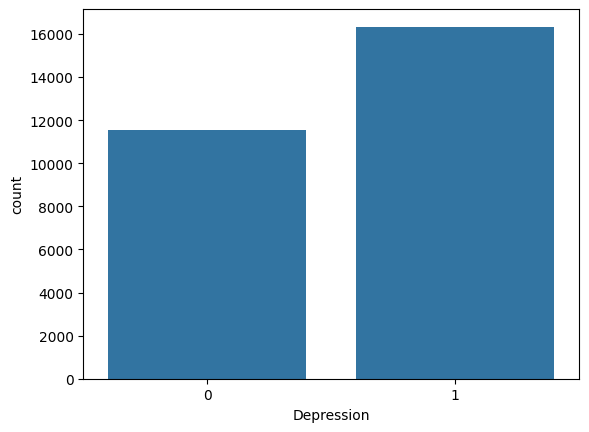

In [59]:
sns.countplot(data=dataset,x="Depression")

In [60]:
dataset["Dietary Habits"]

0          Healthy
1         Moderate
2          Healthy
3         Moderate
4         Moderate
           ...    
27896    Unhealthy
27897      Healthy
27898    Unhealthy
27899      Healthy
27900      Healthy
Name: Dietary Habits, Length: 27901, dtype: object

##### Porcentagem dos alunos de cada categoria de saúde que possuem depressão 

<Axes: xlabel='Dietary Habits', ylabel='Depression'>

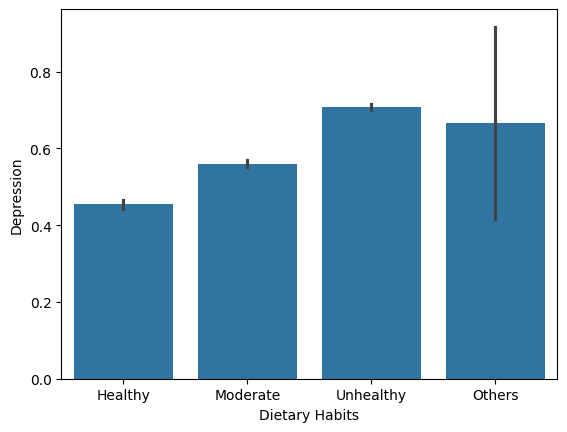

In [62]:
sns.barplot(data=dataset, x="Dietary Habits", y="Depression")

<Axes: xlabel='Dietary Habits', ylabel='percent'>

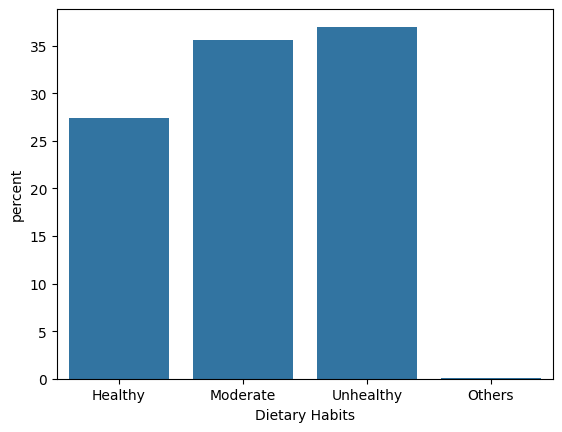

In [64]:
sns.countplot(data=dataset, x="Dietary Habits", stat="percent")

##### Proporção de depressão por hábitos alimentares

<Axes: xlabel='Dietary Habits', ylabel='count'>

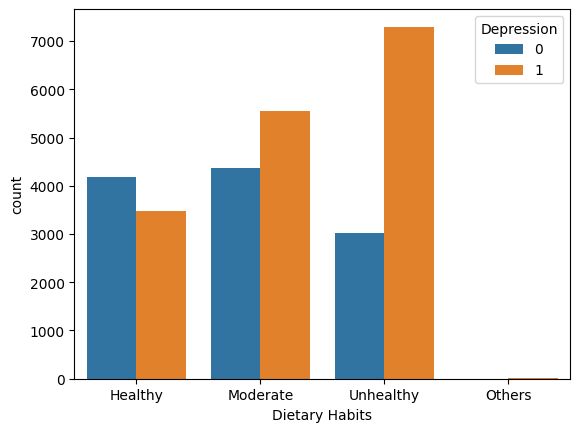

In [65]:
sns.countplot(data=dataset, x="Dietary Habits", hue="Depression")

##### Quantidade de pessoas de cada hábito alimentar

<Axes: xlabel='Dietary Habits', ylabel='count'>

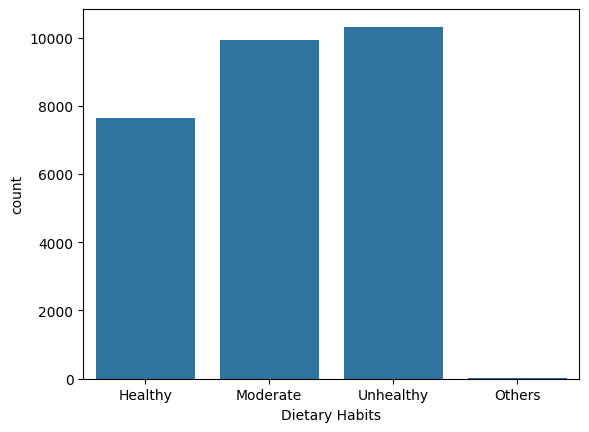

In [66]:
sns.countplot(data=dataset, x="Dietary Habits")

In [67]:
dataset.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'High-School',
       'Bachelors', 'Masters', 'Doctorate', 'Depression'],
      dtype='object')

<Axes: xlabel='Sleep Duration', ylabel='count'>

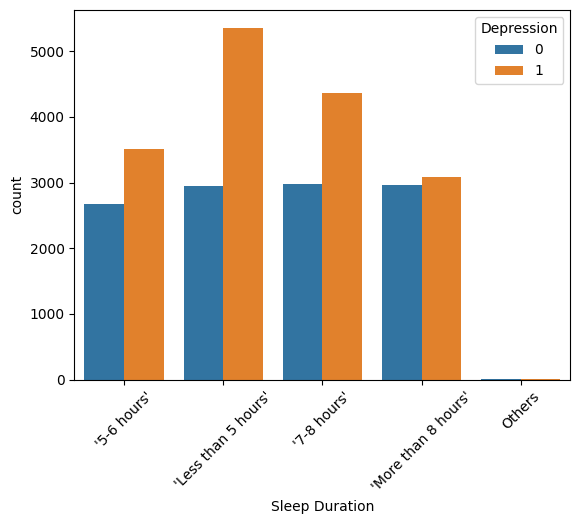

In [70]:
plt.xticks(rotation=45)
sns.countplot(data=dataset,x="Sleep Duration", hue="Depression")

<Axes: xlabel='Sleep Duration', ylabel='percent'>

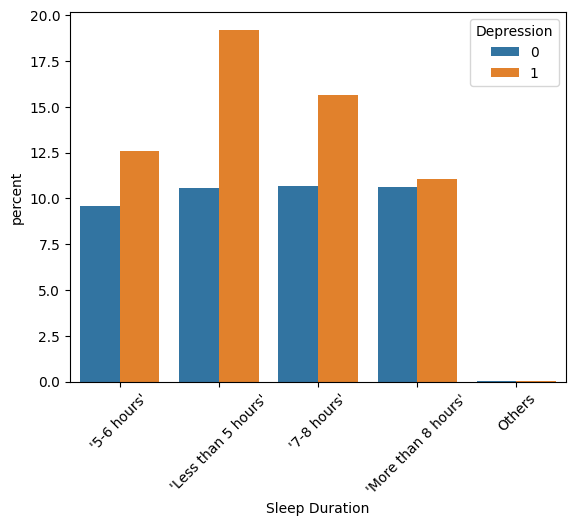

In [ ]:
plt.xticks(rotation=45)
sns.countplot(data=dataset, x="Sleep Duration", hue="Depression", stat="percent")

In [74]:
dataset.loc[(dataset["Sleep Duration"] == "'Less than 5 hours'") & dataset["Depression"] == 1].shape[0]

5361

In [83]:
qtd_Depression = len(dataset.loc[dataset["Depression"] == 1])

In [ ]:
less5andDepression = (5361/qtd_Depression)*100
less5andDepression
# Entre os alunos deprimidos 32% dormem menos que 5 horas por noite

32.817091087169445

##### Pessoas que dormem entre 7 a 8 horas e tem depressão

In [82]:
sa8 = dataset.loc[(dataset["Sleep Duration"] == "'7-8 hours'") & dataset["Depression"] == 1].shape[0]

In [85]:
sa8Depression = (sa8/qtd_Depression)*100
sa8Depression

26.756856023506366

<Axes: xlabel='Sleep Duration', ylabel='count'>

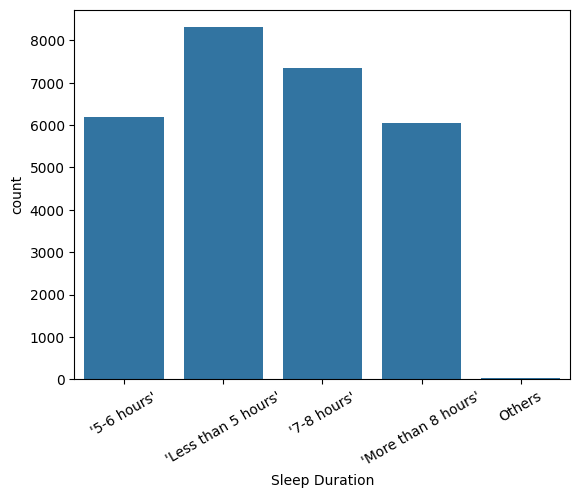

In [89]:
plt.xticks(rotation = 30)
sns.countplot(data=dataset, x="Sleep Duration")

In [93]:
qtd_less_5_hours = len(dataset.loc[dataset["Sleep Duration"] == "'Less than 5 hours'"])

##### 64,5% das pessoas que dormem menos que 5 horas por noite possuem depressão

In [95]:
(5361/qtd_less_5_hours)*100

64.51263537906136

In [96]:
dataset.loc[(dataset["Sleep Duration"] == "'More than 8 hours'") & dataset["Depression"] == 1].shape[0]

3078

In [97]:
dataset.loc[dataset["Sleep Duration"] == "'More than 8 hours'"].shape[0]

6044

##### 50,92% das pessoas que dormem mais de 8 horas possuem depressão

In [98]:
(3078/6044)*100

50.92653871608207

##### Porcentagem de pessoas que estão em determinada categoria e possuem depressão

<Axes: xlabel='Sleep Duration', ylabel='Depression'>

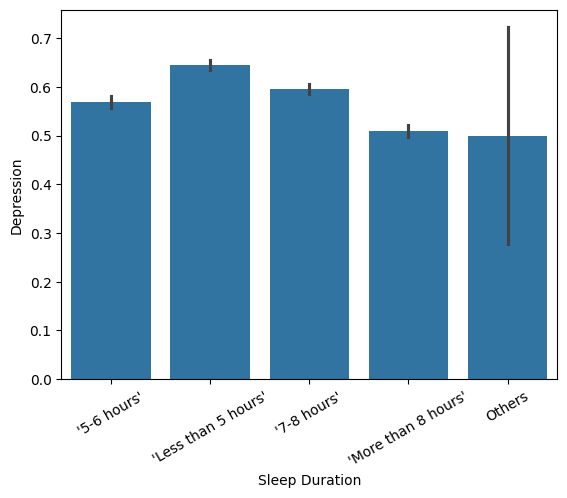

In [102]:
plt.xticks(rotation=30)
sns.barplot(data=dataset,x="Sleep Duration", y="Depression")